In [58]:
import pandas as pd #principal herramienta de gestion de datasets como dataframe
import numpy as np #para trabajar con arrays y algunas cuestiones estadisticas
from sklearn import preprocessing #procesamiento de detasets 
from sklearn.metrics import mean_squared_error #herramienta estadistica para medir errores
import seaborn as sns #herramienta grafica
sns.set()
from sklearn.model_selection import train_test_split #para separar el dataset en entrenamiento y testeo
from sklearn.tree import DecisionTreeClassifier #modelo de arbol
from sklearn.metrics import confusion_matrix #para crear la matriz de confusión
from sklearn.metrics import ConfusionMatrixDisplay #para graficar la matriz de confusión
from sklearn.model_selection import GridSearchCV #para optimización de hiperparámetro
import joblib #airve para bajar el modelo entrenado y guardarlo como un achivo
from sklearn import tree #modelo de arbol
import matplotlib.pyplot #herramienta grafica
import matplotlib.pyplot as plt #herramienta grafica
from sklearn.model_selection import cross_validate #para validacion cruzada 
from sklearn.metrics import accuracy_score #metrica accuracy
from sklearn.metrics import precision_score #metrica precisión
from sklearn.metrics import recall_score #metrica recall
from sklearn.metrics import f1_score #metrica f1 score
import warnings #evita que se llene de warnings el script
warnings.filterwarnings("ignore", category=FutureWarning) #evita que se llene de warnings el script
from sklearn.preprocessing import OrdinalEncoder # preprocesamiento de columna


In [59]:
#clono el repositorio

In [60]:
!git clone https://github.com/soyHenry/Datathon.git

fatal: destination path 'Datathon' already exists and is not an empty directory.


In [61]:
#ingesto los datos en dataframe de pandas

In [62]:
df_train=pd.read_csv('Datathon/hospitalizaciones_train.csv')

In [63]:
df1=df_train.copy() #realizo una copia para trabajar con back up de los datos crudos 

In [64]:
#creo una funcion para adaptar la columna label a categórica

In [65]:
def transf_label(df):
    lista_dias=df['Stay (in days)']
    lista_estancia=[]
    for i in lista_dias:
        if i <=8: 
            i=0
        elif i>8:
            i=1
        lista_estancia.append(i)
    array_estancia=np.array(lista_estancia)
    array_estancia.reshape(1,-1)
    array_estancia.shape
    df['estancia']=array_estancia
    df.drop(columns=['Stay (in days)'], inplace=True)
    return df

In [66]:
#aplico la función

In [67]:
transf_label(df1)

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,estancia
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,0
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,1
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,0
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,0
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409995,1,gynecology,D,Dr Sarah,1,63105,31-40,Female,Trauma,Minor,Asthama,3,Yes,3902.291076,0
409996,5,gynecology,D,Dr Nathan,5,129292,21-30,Female,Trauma,Extreme,Other,4,No,4771.995223,1
409997,4,gynecology,D,Dr Sarah,9,11399,21-30,Female,Emergency,Minor,Asthama,4,Yes,3816.994210,1
409998,10,gynecology,D,Dr Olivia,10,75003,21-30,Female,Trauma,Moderate,Other,2,Yes,3841.577491,1


In [68]:
#Realizo una transormación de las columnas categoricas a numéricas 
#con label encoder en las no ordinales y ordinal encoder en las que si

In [69]:
le = preprocessing.LabelEncoder()
df1['Insurance'] = le.fit_transform(df1['Insurance'])
df1['health_conditions'] = le.fit_transform(df1['health_conditions'])
df1['Type of Admission'] = le.fit_transform(df1['Type of Admission'])
df1['gender'] = le.fit_transform(df1['gender'])
df1['doctor_name'] = le.fit_transform(df1['doctor_name'])
df1['Ward_Facility_Code'] = le.fit_transform(df1['Ward_Facility_Code'])
df1['Department'] = le.fit_transform(df1['Department'])

In [70]:
enc = OrdinalEncoder()
df1['Age'] = enc.fit_transform(df1[['Age']])
df1['Severity of Illness'] = enc.fit_transform(df1[['Severity of Illness']])

In [71]:
df2=df1.copy() #se generan 2 data frame con distintas columnas para aplicar el modelo y analizar diferencias 

In [72]:
df3=df1.copy() #se generan 2 data frame con distintas columnas para aplicar el modelo y analizar diferencias 

In [73]:
# ACONTINUACIÓN SE PUEDE VER TODOS LOS ARBOLES GENERADOS Y SUS METRICAS CONSIDERANDO DISTINTAS FREATURES 
#_ ESTE PUNTO SE EXPLICA MEJOR EN EL TXT ESTRATEGIA FINAL

y1=df1[['estancia']]
y2=df2[['estancia']]
#TODO _ x=df[['Available Extra Rooms in Hospital','Department','Ward_Facility_Code','doctor_name','staff_available','patientid','Age','gender','Type of Admission','Severity of Illness','health_conditions','Visitors with Patient','Insurance','Admission_Deposit']]
X1=df1[['Available Extra Rooms in Hospital','doctor_name','Department','Severity of Illness','health_conditions','Visitors with Patient','Insurance','Admission_Deposit']]
X2=df2[['Department','Age', 'doctor_name']]
'''
--------------0.3
El valor de la precisión para este modelo es de [0.4560795  0.64296281]
El valor de la recall es de [0.25191037 0.81765805]
El valor de accuracy es de 0.6039756097560975
El f1-score es de:[0.32455593 0.71986336], type[0.32455593 0.71986336]
------------0.2
El valor de la precisión para este modelo es de [0.45788829 0.64286926]
El valor de la recall es de [0.25297475 0.81784306]
El valor de accuracy es de 0.6042195121951219
El f1-score es de:[0.32589731 0.7198764 ], type[0.32589731 0.7198764 ]

'''


#X1=df1[['Department','Age', 'doctor_name','gender']]
'''
------------0.3
El valor de la precisión para este modelo es de [0.40814987 0.62924725]
El valor de la recall es de [0.20072325 0.82334113]
El valor de accuracy es de 0.5881788617886179
El f1-score es de:[0.26910424 0.71332684], type[0.26910424 0.71332684]
'''

#X1=df1[['Department','Age', 'doctor_name','gender','Insurance']]
'''
---------0.3
El valor de la precisión para este modelo es de [0.40814987 0.62924725]
El valor de la recall es de [0.20072325 0.82334113]
El valor de accuracy es de 0.5881788617886179
El f1-score es de:[0.26910424 0.71332684], type[0.26910424 0.71332684]

'''

#X1=df1[['Department']]
'''
-------------0.3
El valor de la precisión para este modelo es de [0.36356172 0.61923465]
El valor de la recall es de [0.17155649 0.81772337]
El valor de accuracy es de 0.5736666666666667
El f1-score es de:[0.23311251 0.70477027], type[0.23311251 0.70477027]
-------------0.2
El valor de la precisión para este modelo es de [0.36266978 0.61846282]
El valor de la recall es de [0.17048789 0.81778423]
El valor de accuracy es de 0.5729878048780488
El f1-score es de:[0.23194192 0.70429268], type[0.23194192 0.70429268]
'''
#con todo menos ID
#X1=df1[['Available Extra Rooms in Hospital','Department','Ward_Facility_Code','doctor_name','staff_available','Age','gender','Type of Admission','Severity of Illness','health_conditions','Visitors with Patient','Insurance','Admission_Deposit']]
''' 
---------------0.3
El valor de la precisión para este modelo es de [0.39985609 0.6287695 ]
El valor de la recall es de [0.23923198 0.78207021]
El valor de accuracy es de 0.5770406504065041
El f1-score es de:[0.29935894 0.69709109], type[0.29935894 0.69709109]
-----0.2
El valor de la precisión para este modelo es de [0.39985609 0.6287695 ]
El valor de la recall es de [0.23923198 0.78207021]
El valor de accuracy es de 0.5770406504065041
El f1-score es de:[0.29935894 0.69709109], type[0.29935894 0.69709109]
'''
# con todo menos id - staff available 
#X1=df1[['Available Extra Rooms in Hospital','Department','Ward_Facility_Code','doctor_name','Age','gender','Type of Admission','Severity of Illness','health_conditions','Visitors with Patient','Insurance','Admission_Deposit']]
'''
El valor de la precisión para este modelo es de [0.36356172 0.61923465]
El valor de la recall es de [0.17155649 0.81772337]
El valor de accuracy es de 0.5736666666666667
El f1-score es de:[0.23311251 0.70477027], type[0.23311251 0.70477027]
'''

'\nEl valor de la precisión para este modelo es de [0.36356172 0.61923465]\nEl valor de la recall es de [0.17155649 0.81772337]\nEl valor de accuracy es de 0.5736666666666667\nEl f1-score es de:[0.23311251 0.70477027], type[0.23311251 0.70477027]\n'

In [74]:
#realizo la primera partición de los datos, luego se hará una validación cruzada

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state=20) 

# datos, dejo un 30% para testear

print(X1_train.shape, y1_train.shape, X1_test.shape, y1_test.shape)

(287000, 8) (287000, 1) (123000, 8) (123000, 1)


In [75]:
#COMO PUEDE VERSE ESTO SE RELIZA DOS VECES PORQUE SE ESTAN RELIZANDO 2 ARBOLES CON DISTINTA CANTIDAD DE FEATURES CADA UNO 
#PARA COMPARAR SU EFICACIA EN DETECCION DE FALSOS POSITIVOS, ESTE FUE UN PUNTO FLOJO A SOLUCIONAR DURANTE EL PROCESO DE MODELADO

In [76]:
#realizo la primera partición de los datos, luego se hará una validación cruzada

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.30, random_state=20) 

# datos, dejo un 30% para testear

print(X2_train.shape, y2_train.shape, X2_test.shape, y2_test.shape)

(287000, 3) (287000, 1) (123000, 3) (123000, 1)


In [77]:
#CON EL SIGUIENTE CODIGO SE DESARROLLO UN ENSAYO DEL HIOPERARÁMETRO OPTIMO CON VALIDACIÓN CRUZADA 

In [78]:
tree_train_scores_mean = []
tree_train_scores_std = []
tree_test_scores_mean = []
tree_test_scores_std = []

profundidades = np.arange(1,20,1)

for profundidad in profundidades:
    clf1 = DecisionTreeClassifier(max_depth=profundidad)
    tree_scores = cross_validate(clf1, X1, y1, cv=3, return_train_score=True, n_jobs = -1)
    
    tree_train_scores_mean.append(tree_scores['train_score'].mean())
    tree_train_scores_std.append(tree_scores['train_score'].std())
    
    tree_test_scores_mean.append(tree_scores['test_score'].mean())
    tree_test_scores_std.append(tree_scores['test_score'].std())

tree_train_scores_mean = np.array(tree_train_scores_mean)
tree_train_scores_std = np.array(tree_train_scores_std)
tree_test_scores_mean = np.array(tree_test_scores_mean)
tree_test_scores_std = np.array(tree_test_scores_std)

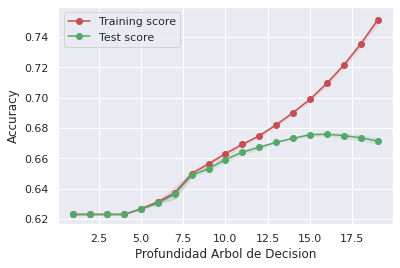

In [79]:
plt.fill_between(profundidades, tree_train_scores_mean - tree_train_scores_std,
                 tree_train_scores_mean + tree_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(profundidades, tree_test_scores_mean - tree_test_scores_std,
                 tree_test_scores_mean + tree_test_scores_std, alpha=0.1, color="g")

plt.plot(profundidades, tree_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(profundidades, tree_test_scores_mean, 'o-', color="g",
         label="Test score")


plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Profundidad Arbol de Decision')
plt.show()


In [80]:
#como puede observase aquí tomando las variables que no correlacionan pero tendrían sentido lógico (fisico_ VER RESUMEN ESTRATEGIA ), el modelo no es capaz de ajustar, sin embargo se tomará un deep de 8 y se realizará el analisis

In [81]:
tree_train_scores_mean = []
tree_train_scores_std = []
tree_test_scores_mean = []
tree_test_scores_std = []

profundidades = np.arange(1,20,1)

for profundidad in profundidades:
    clf2 = DecisionTreeClassifier(max_depth=profundidad)
    tree_scores = cross_validate(clf2, X2, y2, cv=3, return_train_score=True, n_jobs = -1)
    
    tree_train_scores_mean.append(tree_scores['train_score'].mean())
    tree_train_scores_std.append(tree_scores['train_score'].std())
    
    tree_test_scores_mean.append(tree_scores['test_score'].mean())
    tree_test_scores_std.append(tree_scores['test_score'].std())

tree_train_scores_mean = np.array(tree_train_scores_mean)
tree_train_scores_std = np.array(tree_train_scores_std)
tree_test_scores_mean = np.array(tree_test_scores_mean)
tree_test_scores_std = np.array(tree_test_scores_std)

In [82]:
#tube que modificar los parámetros porque estaba overfitting, por eso la particion es de cv=3

In [83]:
#a continuación se grafica el accuracy en base a los distintos niveles de profundidad del arbol

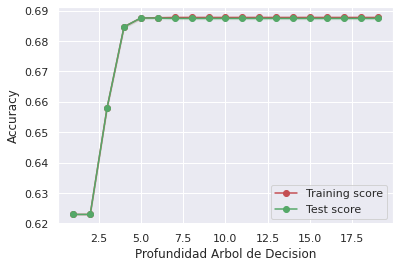

In [84]:
plt.fill_between(profundidades, tree_train_scores_mean - tree_train_scores_std,
                 tree_train_scores_mean + tree_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(profundidades, tree_test_scores_mean - tree_test_scores_std,
                 tree_test_scores_mean + tree_test_scores_std, alpha=0.1, color="g")

plt.plot(profundidades, tree_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(profundidades, tree_test_scores_mean, 'o-', color="g",
         label="Test score")


plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Profundidad Arbol de Decision')
plt.show()


In [85]:
#se guarda un archivo con el modelo entrenado 

In [86]:
joblib.dump(clf2,'Arbol_entrenado_2')

['Arbol_entrenado_2']

In [87]:
#nuevo arbol para subir el accuracy
clf2 = DecisionTreeClassifier(max_depth=5)
clf2.fit(X2_train, y2_train)

DecisionTreeClassifier(max_depth=5)

In [88]:
#se predice con el nuevo arbol

In [89]:
y2_train_pred = clf2.predict(X2_train)
y2_test_pred = clf2.predict(X2_test)

In [90]:
#medición de metricas 

In [91]:
from sklearn import metrics

print("accuracy: ", metrics.accuracy_score(y2_test,y2_test_pred))
print("Recall: ", metrics.recall_score(y2_test,y2_test_pred))
print("F1score:", metrics.f1_score(y2_test,y2_test_pred))

accuracy:  0.688260162601626
Recall:  0.9999869727208776
F1score: 0.8001521895489562


In [92]:
#analisis de las mismas metricas pero en comparación con el valor supuesto (enh los bloques se comprar ambos arboles con distintos features)

In [93]:
#EXACTITUD
exactitud = accuracy_score(y2_test, y2_test_pred)

#PRECISION
precision = precision_score(y2_test, y2_test_pred, average= None)

#EXAHUSTIVIDAD/RECALL/SENSIBILIDAD
recall1= recall_score(y2_test, y2_test_pred, average= None)

#F1-SCORE
precision1 = f1_score(y2_test, y2_test_pred, average= None)

print(f'El valor de la precisión para este modelo es de {precision}')
print(f'El valor de la recall es de {recall1}')
print(f'El valor de accuracy es de {exactitud}')
print(f'El f1-score es de:{precision1}, type{precision1}')

El valor de la precisión para este modelo es de [0.99987335 0.66688386]
El valor de la recall es de [0.170747   0.99998697]
El valor de accuracy es de 0.688260162601626
El f1-score es de:[0.2916836  0.80015219], type[0.2916836  0.80015219]


In [94]:
#CONTINUAMOS CON EL ENSAYO DEL ARBOL 1 AUNQUE NO TENGA SENTIDO MATEMÁTICO SIMPLEMENTE PARE COMPARAR EL RESULTADO FINAL 

In [95]:
clf1 = DecisionTreeClassifier(max_depth=8)
clf1.fit(X1_train, y1_train)

DecisionTreeClassifier(max_depth=8)

In [96]:
y1_train_pred = clf1.predict(X1_train)
y1_test_pred = clf1.predict(X1_test)

In [97]:
print("accuracy: ", metrics.accuracy_score(y1_test,y1_test_pred))
print("Recall: ", metrics.recall_score(y1_test,y1_test_pred))
print("F1score:", metrics.f1_score(y1_test,y1_test_pred))

accuracy:  0.6485691056910569
Recall:  0.9021260519527892
F1score: 0.7621337853007858


In [98]:
# Y AHORA VEMOS LAS METRICAS CONTRA EL TEST

In [99]:
#EXACTITUD
exactitud = accuracy_score(y1_test, y1_test_pred)

#PRECISION
precision = precision_score(y1_test, y1_test_pred, average= None)

#EXAHUSTIVIDAD/RECALL/SENSIBILIDAD
recall1= recall_score(y1_test, y1_test_pred, average= None)

#F1-SCORE
precision1 = f1_score(y1_test, y1_test_pred, average= None)

print(f'El valor de la precisión para este modelo es de {precision}')
print(f'El valor de la recall es de {recall1}')
print(f'El valor de accuracy es de {exactitud}')
print(f'El f1-score es de:{precision1}, type{precision1}')

El valor de la precisión para este modelo es de [0.58349041 0.65975305]
El valor de la recall es de [0.22762663 0.90212605]
El valor de accuracy es de 0.6485691056910569
El f1-score es de:[0.32749393 0.76213379], type[0.32749393 0.76213379]


In [100]:
#No se ensayo con validación cruzada porque el primer arbol está overfiteado

In [101]:
'''
from sklearn.model_selection import cross_validate
#clf2_scores = cross_validate(clf2, X1, y1, cv=5, scoring = ['accuracy'])
y1_train_pred=clf2.predict(X1_train)
y1_test_pred = clf2.predict(X1_test)
#y se vuelven a medir la metricas
#EXACTITUD
exactitud = accuracy_score(y1_test, y1_test_pred)

#PRECISION
precision = precision_score(y1_test, y1_test_pred, average= None)

#EXAHUSTIVIDAD/RECALL/SENSIBILIDAD
recall1= recall_score(y1_test, y1_test_pred, average= None)

#F1-SCORE
precision1 = f1_score(y1_test, y1_test_pred, average= None)

print(f'El valor de la precisión para este modelo es de {precision}')
print(f'El valor de la recall es de {recall1}')
print(f'El valor de accuracy es de {exactitud}')
print(f'El f1-score es de:{precision1}, type{precision1}')
'''

"\nfrom sklearn.model_selection import cross_validate\n#clf2_scores = cross_validate(clf2, X1, y1, cv=5, scoring = ['accuracy'])\ny1_train_pred=clf2.predict(X1_train)\ny1_test_pred = clf2.predict(X1_test)\n#y se vuelven a medir la metricas\n#EXACTITUD\nexactitud = accuracy_score(y1_test, y1_test_pred)\n\n#PRECISION\nprecision = precision_score(y1_test, y1_test_pred, average= None)\n\n#EXAHUSTIVIDAD/RECALL/SENSIBILIDAD\nrecall1= recall_score(y1_test, y1_test_pred, average= None)\n\n#F1-SCORE\nprecision1 = f1_score(y1_test, y1_test_pred, average= None)\n\nprint(f'El valor de la precisión para este modelo es de {precision}')\nprint(f'El valor de la recall es de {recall1}')\nprint(f'El valor de accuracy es de {exactitud}')\nprint(f'El f1-score es de:{precision1}, type{precision1}')\n"

In [102]:
#se desarrolla y grafica la matriz de confusion para comprender donde hay margen para subrir el accuracy y que debemos sacrificar

In [103]:
#MATRIZ

In [104]:
matrix_ = confusion_matrix(y2_train, y2_train_pred)
matrix_2 = confusion_matrix(y2_test, y2_test_pred)

In [105]:
cm_display_ = ConfusionMatrixDisplay(matrix)
cm_display_2 = ConfusionMatrixDisplay(matrix_2)


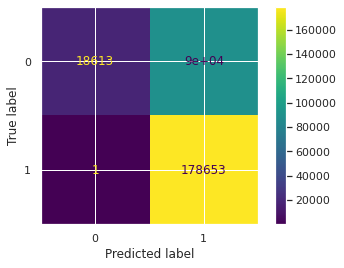

In [106]:
cm_display.plot()
plt.show()

In [107]:
#se observa que el modelo funciona muy bien para los valores de entrenamiento pero tiene MUCHISIMOS falsos positivos en el muestreo 

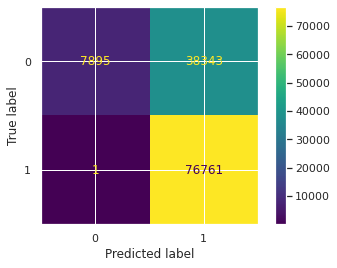

In [108]:
cm_display_2.plot()
plt.show()

In [109]:
#se grafica el arbol para analizar los valores de gini de las ramas y optimizar el mismo

[Text(0.4852941176470588, 0.9166666666666666, 'X[1] <= 4.5\ngini = 0.47\nsamples = 287000\nvalue = [108346, 178654]'),
 Text(0.4264705882352941, 0.75, 'X[0] <= 1.5\ngini = 0.494\nsamples = 243158\nvalue = [108346, 134812]'),
 Text(0.17647058823529413, 0.5833333333333334, 'X[0] <= 0.5\ngini = 0.046\nsamples = 18832\nvalue = [445, 18387]'),
 Text(0.11764705882352941, 0.4166666666666667, 'X[1] <= 2.5\ngini = 0.122\nsamples = 6817\nvalue = [445, 6372]'),
 Text(0.058823529411764705, 0.25, 'gini = 0.0\nsamples = 1817\nvalue = [0, 1817]'),
 Text(0.17647058823529413, 0.25, 'X[1] <= 3.5\ngini = 0.162\nsamples = 5000\nvalue = [445, 4555]'),
 Text(0.11764705882352941, 0.08333333333333333, 'gini = 0.235\nsamples = 2527\nvalue = [343, 2184]'),
 Text(0.23529411764705882, 0.08333333333333333, 'gini = 0.079\nsamples = 2473\nvalue = [102, 2371]'),
 Text(0.23529411764705882, 0.4166666666666667, 'gini = 0.0\nsamples = 12015\nvalue = [0, 12015]'),
 Text(0.6764705882352942, 0.5833333333333334, 'X[0] <= 2.5

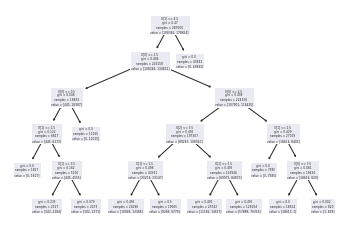

In [110]:
tree.plot_tree(clf2.fit(X2_train, y2_train))

In [111]:
#IMPORTANTE_ luego de ver el índice de gini, tiene sentido poder hacer OTRO tipo de analisis, SEPARANDO las columnas por CATEGORIAS

In [112]:
#Se conserva el arbol 2 que contiene las columnas con correlación demostrable 

In [113]:
#IMPORTANTE: Se guardan los datos, se reliza la prediccion y se suben para el analisis del dashboard

In [114]:
df_test_f=pd.read_csv('Datathon/hospitalizaciones_test.csv')

In [115]:
le = preprocessing.LabelEncoder()
df_test_f['Department'] = le.fit_transform(df_test_f['Department'])
df_test_f['doctor_name'] = le.fit_transform(df_test_f['doctor_name'])

In [116]:
enc = OrdinalEncoder()
df_test_f['Age'] = enc.fit_transform(df_test_f[['Age']])

In [117]:
#RELIZO LA PREDICCION FINAL CON EL DATASET DE TEST

In [118]:
Xf=df_test_f[['Department','Age','doctor_name']]

In [120]:
y_test_pred_f=clf2.predict(Xf)

In [121]:
type(y_test_pred_f)

numpy.ndarray

In [122]:
df_f2=pd.DataFrame()

In [123]:
df_f2['pred']=y_test_pred_f 

In [124]:
df_f2.sample(5)

,pred
65208,0
87761,1
69290,1
17506,1
13739,1


In [125]:
import os
from pathlib import Path as pl

In [ ]:
#EXPORTO EL ARCHIVO COMO CSV _ PARA LA ENTREGA 

In [126]:
filepath = pl('csv_prediccion_arbol/alitfasce.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df_f2.to_csv(filepath,
                 sep= ",",
                 na_rep= "null",
                 header= True,
                 index= False,
                 index_label= None,
                 mode= "w",
                 encoding= "utf-8",
                 compression= "infer",            
                 decimal= "."
                 ) 
os.makedirs('csv_prediccion_arbol', exist_ok=True)  
df_f2.to_csv('csv_prediccion_arbol/alitfasce.csv', index=False)  

In [ ]:
#por mera curiosidad se reliza la matriz de confusión con el arbol 1 que es el que contiene las columnas que tienen sentido físico, logico,
# pero NO presentan correlación de poisson o por features selection tool de sleanr

In [127]:
matrix_3= confusion_matrix(y1_train, y1_train_pred)
matrix_4 = confusion_matrix(y1_test, y1_test_pred)

In [128]:
cm_display_3 = ConfusionMatrixDisplay(matrix_3)
cm_display_4 = ConfusionMatrixDisplay(matrix_4)


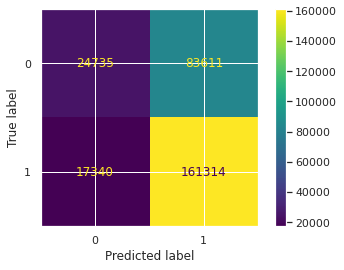

In [129]:
cm_display_3.plot()
plt.show()

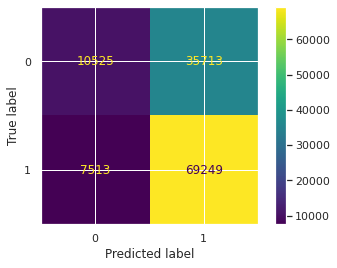

In [130]:
cm_display_4.plot()
plt.show()

In [ ]:
#Como puede observarse este arbol tiene una malisima performance porque las columnas que tomé no correlacionaban, pero hay veces que el preconcepto es tan fuerte que tenía que verlo en los número 